In [ ]:
pip install matplotlib
pip install opencv-python

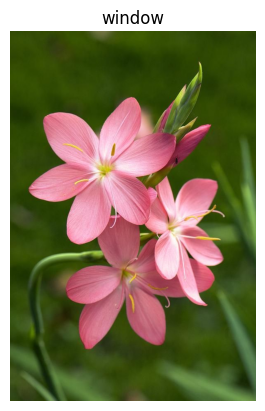

In [4]:
#استدعاء مكتبه openCV
import cv2 as cv 
#استدعاء مكتبه الرسوم البيانيه
from matplotlib import pyplot as plt 
#قراءه الصوره 
img = cv.imread("img2.jpeg")
#اعطاء الصوره الوان
plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB)) 
#اعطاء النافذه اسم
plt.title('window')
#اخفاء المحاور او اظهارها 
plt.axis('off')
#عرض الصوره
plt.show()

In [ ]:
#مكتبه التعامل مع الارقام
pip install numpy
#مكتبه ربط البوت الي في التلقرام مع الاكواد
pip install pyTelegramBotAPI

In [36]:
import telebot
#تستخدم للسريه و اخفاء المفتاح - التشفير 
bot = telebot.TeleBot("6792160197:AAFKzKqyTNG8jZy0JUFJabFa8G02-S1IyL8")
#اوامر الموجوده في البوت
@bot.message_handler(commands=['help'])
def handle_start_help(message):
    help_message=" مرحبا ان بوت توفير مصادر المعسكر يمكنك استخدام هذه الاوامر \n  اضغط /python لتحميل البايثون \n /vscode لتحميل البرنامج"
    bot.send_message(message.chat.id,help_message)

@bot.message_handler(commands=['start'])
def handle_start(message):
    bot.reply_to(message, "مرحباً بكم في البوت التجربي")

@bot.message_handler(commands=['python'])
def handle_python_command(message):
    linkpython = "https://www.python.org/"
    bot.send_message(message.chat.id, f"من الرابط التالي يمكن تحميل البايثون \n {linkpython} ")

@bot.message_handler(commands=['vscode'])
def handle_python_command(message):
    linkvscode = "https://code.visualstudio.com/"
    bot.send_message(message.chat.id , f"من الرابط التالي يمكن تحميل محرر الاكواد \n {linkvscode} ")

@bot.message_handler(func=lambda message: True)
def handle_other_message(message):
    bot.send_message(message.chat.id ,"لروؤيه الاوامر اكتب /help")

#تشغيل البوت
bot.polling()

In [37]:
import telebot
import cv2
import numpy as np
from io import BytesIO

# قم بتبديل 'YOUR_BOT_TOKEN' بتوكن البوت الخاص بك على تليجرام
bot = telebot.TeleBot("6792160197:AAFKzKqyTNG8jZy0JUFJabFa8G02-S1IyL8")

# وظيفة للتعامل مع الصور
@bot.message_handler(content_types=['photo'])
def handle_photo(message):
    # استخراج معرف الصورة
    file_id = message.photo[-1].file_id
    file_info = bot.get_file(file_id)
    file = bot.download_file(file_info.file_path)

    # تحويل الصورة إلى تنسيق OpenCV
    np_array = np.frombuffer(file, dtype=np.uint8)
    img = cv2.imdecode(np_array, cv2.IMREAD_COLOR)

    # تحويل الصورة إلى الأبيض والأسود
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # استخدام كلاسيفاير للكشف عن الوجوه
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # رسم مربعات حول الوجوه
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # حفظ الصورة المعالجة
    processed_image_path = "processed_image.jpg"
    cv2.imwrite(processed_image_path, img)

    # إرسال الصورة المعالجة إلى المستخدم
    processed_image = open(processed_image_path, "rb")
    bot.send_photo(message.chat.id, processed_image)

    # إرسال رسالة تؤكد معالجة الصورة
    bot.send_message(message.chat.id, "تم معالجة الصورة بنجاح!")

# بدء الاستماع على الرسائل الواردة
bot.polling()